In [133]:
import cv2
import matplotlib.pyplot as plt
import glob
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import numpy as np
#TYPES PHOTO SIZES 360, 480, 720, 1080

(2839, 4732, 3) (360, 360, 3)


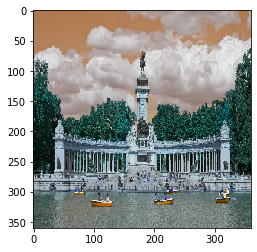

In [22]:
path = './Dataset/alfonso_xii/alfonsoXII_1.jpg'
im = cv2.imread(path)
imres = cv2.resize(im,(360,360))
print(im.shape, imres.shape)
plt.figure()
plt.imshow(imres)

(2526, 4272, 3) (500, 500, 3)


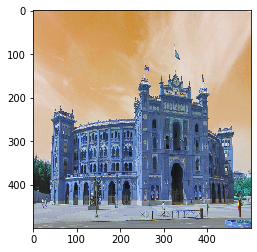

In [21]:
path1 = './Dataset/ventas/ventas_1.jpg'
im1 = cv2.imread(path1)
imres1 = cv2.resize(im1,(500,500))
print(im1.shape, imres1.shape)
plt.figure()
plt.imshow(imres1)

In [123]:
def resizeDataset(path):
    resizedim = []
    for pc in glob.glob(f"./{path}/*/*"):
        resizedim.append(cv2.resize(cv2.imread(pc), (360,360)))
    return np.asarray(resizedim)

In [103]:
for pc in glob.glob("./Dataset/*/*"):
    print(pc)
    break


./Dataset/ayuntamiento/ayuntamiento5.jpg


In [28]:
import os

path, dirs, files = next(os.walk("./Dataset"))
dirs_count = len(dirs)
dirs_count

13

In [73]:
sorted(dirs)

['alfonso_xii',
 'atocha',
 'ayuntamiento',
 'banco_esp',
 'debod',
 'jardin_botanico',
 'la_almudena',
 'museo_prado',
 'palacio_cristal',
 'plaza_mayor',
 'puerta_alcala',
 'schweppes',
 'ventas']

In [124]:
def groundTruth(folder):
    path, dirs, files = next(os.walk(f"./{folder}"))
    GT=[]
    for pc in glob.glob(f"./{folder}/*/*"):
        for i in range(0,len(dirs)):
            if pc.split('/')[-2] == dirs[i]:
                #print(pc.split('/')[-2], i)
                GT.append(i)
    return np.asarray(GT)

In [125]:
GT = groundTruth('Dataset')

In [126]:
X = resizeDataset('Dataset')

In [128]:
print(X.shape, GT.shape)

(1014, 360, 360, 3) (1014,)


In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(811, 360, 360, 3) (203, 360, 360, 3) (811, 13) (203, 13)


In [172]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=(360,360,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [174]:
batch_size = 50
epochs = 5

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 811 samples, validate on 203 samples
Epoch 1/5
811/811 [==============================] - 1475s 2s/step - loss: 5.7373 - accuracy: 0.3453 - val_loss: 1.4742 - val_accuracy: 0.6059
Epoch 2/5
811/811 [==============================] - 1493s 2s/step - loss: 1.4981 - accuracy: 0.5425 - val_loss: 1.3463 - val_accuracy: 0.6108
Epoch 3/5
811/811 [==============================] - 1501s 2s/step - loss: 1.1196 - accuracy: 0.6227 - val_loss: 1.2391 - val_accuracy: 0.7143
Epoch 4/5
811/811 [==============================] - 1419s 2s/step - loss: 0.9541 - accuracy: 0.7041 - val_loss: 1.1546 - val_accuracy: 0.7291
Epoch 5/5
811/811 [==============================] - 1453s 2s/step - loss: 0.7847 - accuracy: 0.7620 - val_loss: 1.1281 - val_accuracy: 0.7192


In [175]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1281013667877084
Test accuracy: 0.7192118167877197


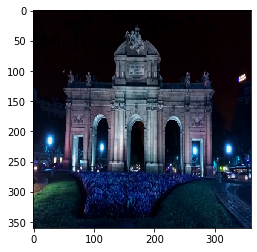

In [192]:
import matplotlib.pyplot as plt
from PIL import Image
img = X_test[95]
pred = model.predict(np.expand_dims(img,axis=0))[0]
plt.imshow(Image.fromarray(img.squeeze()))


In [193]:
for i, p in enumerate(pred):
    if p > 0.8:
        print(dirs[i], p)

puerta_alcala 0.99999976
